In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
import sys
module_path = os.path.abspath(os.path.join('./.')) # or the path to your source code
print(module_path)
sys.path.append(module_path)

from our_lib import *

/home/zmrocze/studia/uwr/sem2/adm/projekt/src


In [11]:
# recsys2025
! PYTHONPATH=$PYTHONPATH:../recsys2025 python -m data_utils.split_data --challenge-data-dir ../ubc_data_dirty

INFO:__main__:Creating splits for product_buy event type
INFO:__main__:Creating splits for add_to_cart event type
INFO:__main__:Creating splits for remove_from_cart event type
INFO:__main__:Creating splits for page_visit event type
INFO:__main__:Creating splits for search_query event type
INFO:__main__:Saving product_buy train input
INFO:__main__:Saving add_to_cart train input
INFO:__main__:Saving remove_from_cart train input
INFO:__main__:Saving page_visit train input
INFO:__main__:Saving search_query train input
INFO:__main__:Saving train_target
INFO:__main__:Saving validation_target


In [12]:

! PYTHONPATH=$PYTHONPATH:../recsys2025 python -m baseline.aggregated_features_baseline.create_embeddings --data-dir ../ubc_data_dirty/ --embeddings-dir ../baseline_embeddings --num-days 1 7 30

/home/zmrocze/studia/uwr/sem2/adm/projekt/recsys2025/baseline/aggregated_features_baseline/calculators.py:26: SyntaxWarning: invalid escape sequence '\d'
  f"{string_representation_of_vector} is incorrect form of string representation of vector – correct form is: '[( *\d* *)*]'"
INFO:__main__:Generating features for product_buy event type
INFO:__main__:Loading data...
INFO:__main__:Generating features...
 79%|██████████████████████████▏      | 330398/416269 [00:54<00:14, 6112.43it/s]
^C
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/zmrocze/studia/uwr/sem2/adm/projekt/recsys2025/baseline/aggregated_features_baseline/create_embeddings.py", line 145, in <module>
    main(params=params)
  File "/home/zmrocze/studia/uwr/sem2/adm/projekt/recsys2025/baseline/aggregated_features_baseline/create_embeddings.py", line 128, in main
    client_ids, embeddings = create_embeddings(
  File "/hom

In [ ]:
# import torchdata
# below would work on torchdata <= 9.0.0
# from torchdata.datapipes.iter import FileLister
# import torcharrow.dtypes as dt
# DTYPE = dt.Struct([dt.Field("Values", dt.int32)])
# source_dp = FileLister(".", masks="df*.parquet")
# parquet_df_dp = source_dp.load_parquet_as_df(dtype=DTYPE)

In [13]:
import pandas as pd

# Load the dataframes from parquet files
add_to_cart = pd.read_parquet('../ubc_data/add_to_cart.parquet')
page_visit = pd.read_parquet('../ubc_data/page_visit.parquet')
product_buy = pd.read_parquet('../ubc_data/product_buy.parquet')
product_properties = pd.read_parquet('../ubc_data/product_properties.parquet')
remove_from_cart = pd.read_parquet('../ubc_data/remove_from_cart.parquet')
search_query = pd.read_parquet('../ubc_data/search_query.parquet')

print(f"Add to cart shape: {add_to_cart.shape}")
print(f"Page visit shape: {page_visit.shape}")
print(f"Product buy shape: {product_buy.shape}")
print(f"Product properties shape: {product_properties.shape}")
print(f"Remove from cart shape: {remove_from_cart.shape}")
print(f"Search query shape: {search_query.shape}")
# Display the first few rows of each dataframe
print("\nAdd to cart sample:")
print(add_to_cart.head())
print("\nPage visit sample:")
print(page_visit.head())
print("\nProduct buy sample:")
print(product_buy.head())
print("\nProduct properties sample:")
print(product_properties.head())
print("\nRemove from cart sample:")
print(remove_from_cart.head())
print("\nSearch query sample:")
print(search_query.head())

Add to cart shape: (5235882, 3)
Page visit shape: (150713186, 3)
Product buy shape: (1682296, 3)
Product properties shape: (1197634, 4)
Remove from cart shape: (1697891, 3)
Search query shape: (9571258, 3)

Add to cart sample:
   client_id            timestamp      sku
0   17649961  2022-08-11 12:22:55  1398840
1     315805  2022-09-11 05:34:10  1434568
2     315805  2022-10-06 04:58:15   998226
3   16696114  2022-07-11 16:27:00    81192
4   10238779  2022-10-05 14:36:55  1475246

Page visit sample:
   client_id            timestamp       url
0   13906876  2022-07-13 10:37:45  12160626
1   13906876  2022-08-11 18:13:20   9464384
2    7825390  2022-05-26 10:28:05   3876331
3   13416433  2022-05-25 18:20:10  15017297
4   13416433  2022-06-03 20:03:20  13003066

Product buy sample:
   client_id            timestamp     sku
0   17649961  2022-07-23 20:15:25   18485
1   16696114  2022-07-11 16:31:30   81192
2   10238779  2022-05-29 19:35:40  510014
3   10238779  2022-05-29 19:38:05  510014


=== FULL DATASET STATISTICS ===

Add to Cart:
  Total interactions: 5,235,882
  Unique users: 1,874,391
  Average interactions per user: 2.79
  Min interactions per user: 1
  Max interactions per user: 1,731
  Median interactions per user: 1.00
  Std interactions per user: 7.38

Page Visit:
  Total interactions: 150,713,186
  Unique users: 18,614,702
  Average interactions per user: 8.10
  Min interactions per user: 1
  Max interactions per user: 28,479
  Median interactions per user: 2.00
  Std interactions per user: 42.53

Product Buy:
  Total interactions: 1,682,296
  Unique users: 750,860
  Average interactions per user: 2.24
  Min interactions per user: 1
  Max interactions per user: 665
  Median interactions per user: 1.00
  Std interactions per user: 3.71

Remove from Cart:
  Total interactions: 1,697,891
  Unique users: 536,626
  Average interactions per user: 3.16
  Min interactions per user: 1
  Max interactions per user: 1,490
  Median interactions per user: 1.00
  Std inter

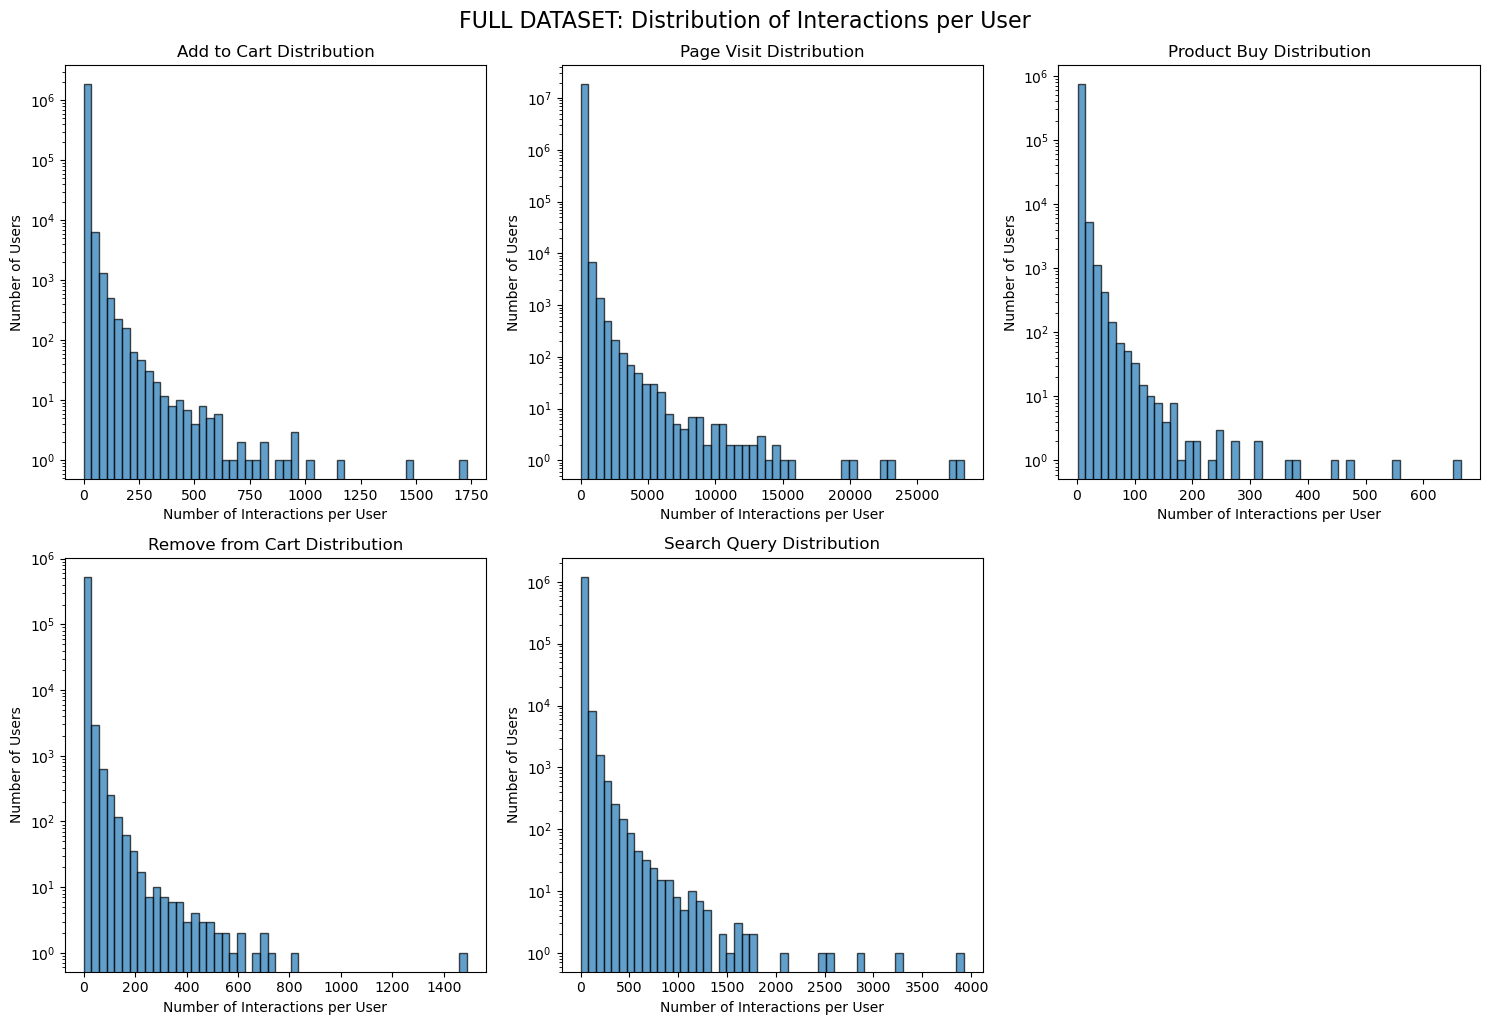

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# Helper function to calculate interaction statistics
def calculate_interaction_stats(df, interaction_name):
  interactions_per_user = df.groupby('client_id').size()
  stats = {
    'name': interaction_name,
    'total_interactions': len(df),
    'unique_users': len(interactions_per_user),
    'avg_interactions_per_user': interactions_per_user.mean(),
    'min_interactions_per_user': interactions_per_user.min(),
    'max_interactions_per_user': interactions_per_user.max(),
    'median_interactions_per_user': interactions_per_user.median(),
    'std_interactions_per_user': interactions_per_user.std()
  }
  return stats, interactions_per_user

# Helper function to plot distribution
def plot_interaction_distribution(interactions_per_user, title, subplot_pos=None):
  if subplot_pos:
    plt.subplot(subplot_pos)
  plt.hist(interactions_per_user, bins=50, alpha=0.7, edgecolor='black')
  plt.xlabel('Number of Interactions per User')
  plt.ylabel('Number of Users')
  plt.title(title)
  plt.yscale('log')  # Log scale for better visualization

def print_datasets_stats_nicely(title_name, datasets):
  # Calculate statistics for all datasets
  title_name = title_name.upper()
  print(f"=== {title_name} STATISTICS ===")
  all_stats = []
  all_distributions = []

  for df, name in datasets:
    stats, distribution = calculate_interaction_stats(df, name)
    all_stats.append(stats)
    all_distributions.append(distribution)
    
    print(f"\n{name}:")
    print(f"  Total interactions: {stats['total_interactions']:,}")
    print(f"  Unique users: {stats['unique_users']:,}")
    print(f"  Average interactions per user: {stats['avg_interactions_per_user']:.2f}")
    print(f"  Min interactions per user: {stats['min_interactions_per_user']}")
    print(f"  Max interactions per user: {stats['max_interactions_per_user']:,}")
    print(f"  Median interactions per user: {stats['median_interactions_per_user']:.2f}")
    print(f"  Std interactions per user: {stats['std_interactions_per_user']:.2f}")

  # Plot distributions for full dataset
  plt.figure(figsize=(15, 10))
  for i, (distribution, (_, name)) in enumerate(zip(all_distributions, datasets)):
    plot_interaction_distribution(distribution, f'{name} Distribution', 231 + i)

  plt.tight_layout()
  plt.suptitle(f'{title_name}: Distribution of Interactions per User', y=1.02, fontsize=16)
  plt.show()


datasets = [
  (add_to_cart, 'Add to Cart'),
  (page_visit, 'Page Visit'),
  (product_buy, 'Product Buy'),
  (remove_from_cart, 'Remove from Cart'),
  (search_query, 'Search Query')
]

print_datasets_stats_nicely("Full Dataset", datasets)


Total unique users across all datasets: 18,889,063
Sampled users: 944,453
Add to Cart: 1,874,391 users -> 93,400 users (262,119 interactions)
Page Visit: 18,614,702 users -> 930,682 users (7,537,340 interactions)
Product Buy: 750,860 users -> 37,439 users (84,050 interactions)
Remove from Cart: 536,626 users -> 26,852 users (85,482 interactions)
Search Query: 1,223,173 users -> 61,373 users (480,252 interactions)
=== SAMPLED DATASETS STATISTICS ===

Add to Cart (5% sample):
  Total interactions: 262,119
  Unique users: 93,400
  Average interactions per user: 2.81
  Min interactions per user: 1
  Max interactions per user: 609
  Median interactions per user: 1.00
  Std interactions per user: 6.89

Page Visit (5% sample):
  Total interactions: 7,537,340
  Unique users: 930,682
  Average interactions per user: 8.10
  Min interactions per user: 1
  Max interactions per user: 10,578
  Median interactions per user: 2.00
  Std interactions per user: 42.07

Product Buy (5% sample):
  Total int

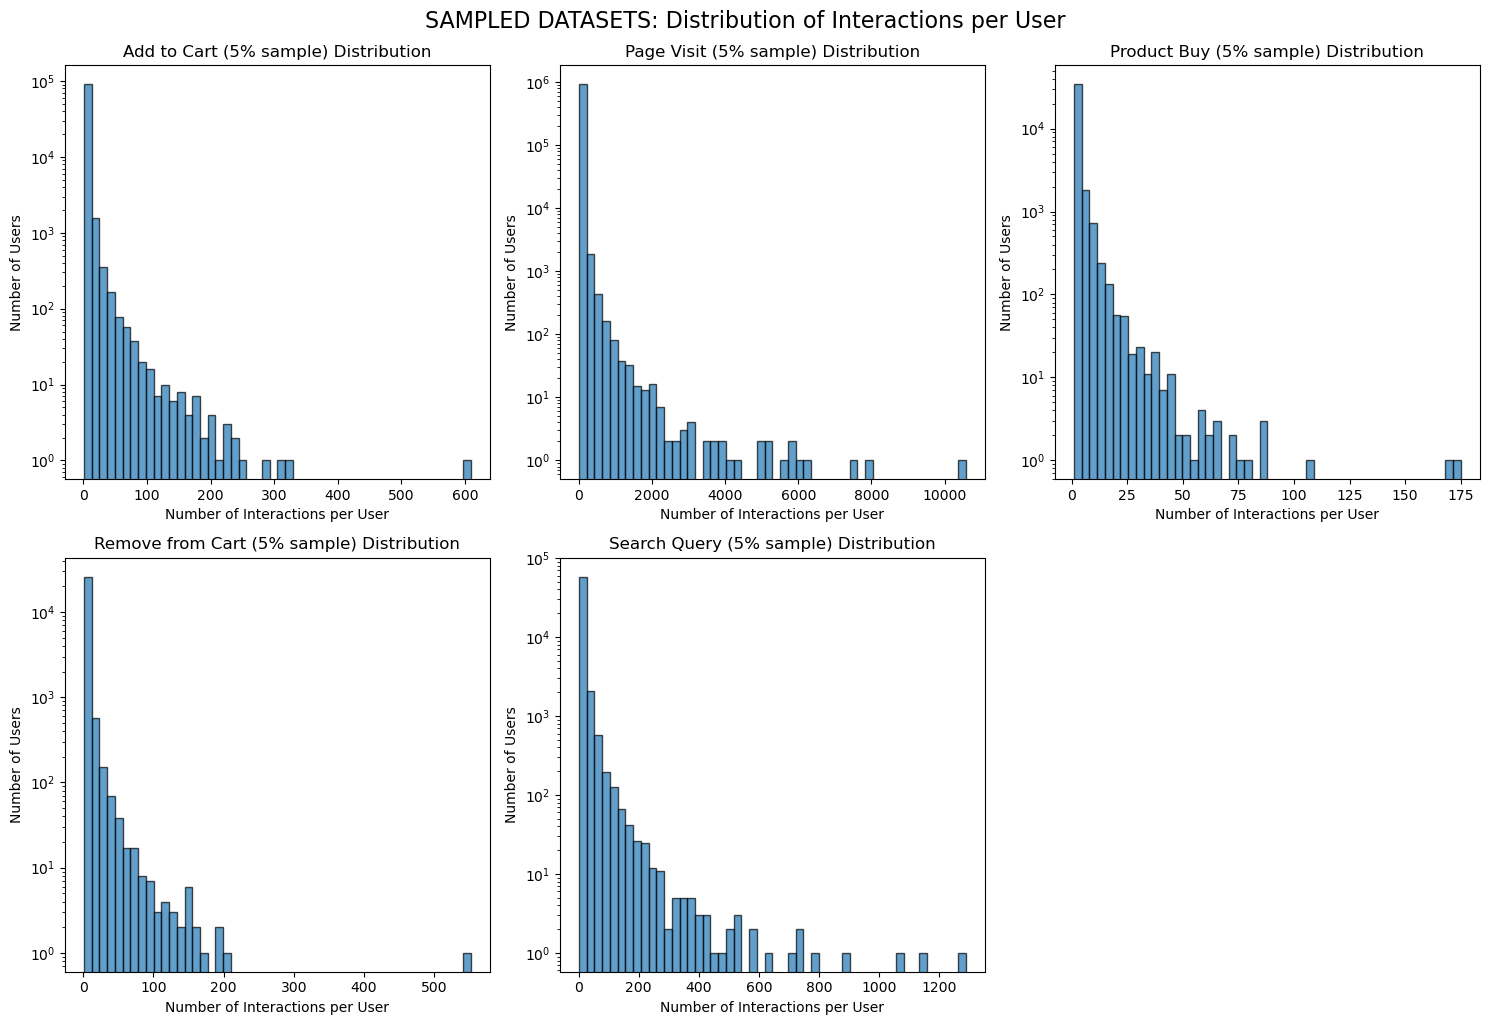

In [29]:

# Take random 5% of all unique users across all datasets
sample_fraction = 0.05

# Get all unique users across all datasets
all_users = set()
for df, name in datasets:
  all_users.update(df['client_id'].unique())

print(f"Total unique users across all datasets: {len(all_users):,}")

all_users = list(all_users)  # Convert to list for sampling

# Sample 5% of all users
np.random.seed(42)  # For reproducibility
sampled_users = np.random.choice(all_users, size=int(len(all_users) * sample_fraction), replace=False)
sampled_users_set = set(sampled_users)

print(f"Sampled users: {len(sampled_users):,}")

# Filter each dataset to only include sampled users
sampled_datasets = []
for df, name in datasets:
  sampled_df = df[df['client_id'].isin(sampled_users_set)].reset_index(drop=True)
  sampled_datasets.append((sampled_df, f"{name} (5% sample)"))
  
  original_users = df['client_id'].nunique()
  sampled_users_in_df = sampled_df['client_id'].nunique()
  print(f"{name}: {original_users:,} users -> {sampled_users_in_df:,} users ({len(sampled_df):,} interactions)")

add_to_cart_sample = sampled_datasets[0][0]
page_visit_sample = sampled_datasets[1][0]
product_buy_sample = sampled_datasets[2][0]
remove_from_cart_sample = sampled_datasets[3][0]
search_query_sample = sampled_datasets[4][0]

sampled_datasets = [
  (add_to_cart_sample, 'Add to Cart (5% sample)'),
  (page_visit_sample, 'Page Visit (5% sample)'),
  (product_buy_sample, 'Product Buy (5% sample)'),
  (remove_from_cart_sample, 'Remove from Cart (5% sample)'),
  (search_query_sample, 'Search Query (5% sample)')
]

print_datasets_stats_nicely("Sampled Datasets", sampled_datasets)

In [30]:
class RecSysData:
  def __init__(self, add_to_cart, page_visit, product_buy, remove_from_cart, search_query):
    self.add_to_cart = add_to_cart
    self.page_visit = page_visit
    self.product_buy = product_buy
    self.remove_from_cart = remove_from_cart
    self.search_query = search_query
  def __repr__(self):
    return (f"RecSysData(\n"
        f"  add_to_cart={len(self.add_to_cart)},\n"
        f"  page_visit={len(self.page_visit)},\n"
        f"  product_buy={len(self.product_buy)},\n"
        f"  remove_from_cart={len(self.remove_from_cart)},\n"
        f"  search_query={len(self.search_query)}\n"
        f")")

  def save_parquet(self, dir_path):
    if not os.path.exists(dir_path):
      os.makedirs(dir_path)
    self.add_to_cart.to_parquet(os.path.join(dir_path, 'add_to_cart.parquet'), index=False)
    self.page_visit.to_parquet(os.path.join(dir_path, 'page_visit.parquet'), index=False)
    self.product_buy.to_parquet(os.path.join(dir_path, 'product_buy.parquet'), index=False)
    self.remove_from_cart.to_parquet(os.path.join(dir_path, 'remove_from_cart.parquet'), index=False)
    self.search_query.to_parquet(os.path.join(dir_path, 'search_query.parquet'), index=False)

In [31]:
sampled_data = RecSysData(
  add_to_cart_sample,
  page_visit_sample,
  product_buy_sample,
  remove_from_cart_sample,
  search_query_sample
)
# Save the sampled data to parquet files
sampled_data.save_parquet('../ubc_data_sampled')

In [47]:
import os
import sys
# module_path = os.path.abspath(os.path.join('../.')) # or the path to your source code
module_path = os.path.abspath(os.path.join('../recsys2025')) # or the path to your source code
# module_path = os.path.abspath(os.path.join('../recsys2025')) # or the path to your source code
print(module_path)
sys.path.append(module_path)

from recsys2025.validator.validate import validate_and_load_embeddings

# import recsys2025.data_utils.validate_and_load_embeddings
validate_and_load_embeddings

/home/zmrocze/studia/uwr/sem2/adm/projekt/recsys2025


<function recsys2025.validator.validate.validate_and_load_embeddings(input_dir: pathlib._local.Path, embeddings_dir: pathlib._local.Path, max_embedding_dim: int, disable_relevant_clients_check: bool) -> Tuple[numpy.ndarray, numpy.ndarray]>